<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset">Maladie d'Alzheimer (Diagnostic)</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/alzheimer_logo.jpg" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/alzheimer.png" width="512">
</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

In [2]:
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [3]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

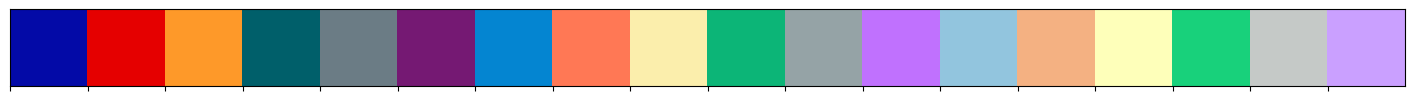

In [4]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [5]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee, afficheSeparationsBinaires

In [6]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram,\
                         affichageDistribution,afficheColonneCible, add_median_labels, formatPct, createColumnsQualitatives

In [7]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

In [8]:
projet = initProjet(repertoireRacine='.',nomProjet='MaladieAlzheimer-Classifications')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
        <tr>                                                                                   
             <th style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>alzheimers_disease_data.csv</th>
             <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/alzheimer_logo.jpg" width="128"></th>
        </tr>  
<table>   
<table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;"> </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>    
    <tr>
        <th  style="text-align:left"> </th>                            
        <th  style="text-align:left;font-style: italic">ID patient</th> 
        <th  style="text-align:left;font-style: italic">identifiant unique attribué à chaque patient (4751 à 6900)</th>
    </tr>  
    <tr>
        <th  style="text-align:left"> </th>                            
        <th  style="text-align:left;color:red;font-style: italic">Diagnosis</th> 
        <th  style="text-align:left;color:red;font-style: italic">statut du diagnostic de la maladie d'Alzheimer, où <b>0</b> indique <b>Non</b> et <b>1</b> indique <b>Oui</b></th>
    </tr>        
    <tr>
        <th  style="text-align:left">1 </th>                            
        <th  style="text-align:left;font-style: italic">Age</th> 
        <th  style="text-align:left;font-style: italic">l'âge des patients varie de 60 à 90 ans</th>
    </tr>    
    <tr>
        <th  style="text-align:left">2 </th>                            
        <th  style="text-align:left">Gender</th>                            
        <th  style="text-align:left">sexe des patients, où <b>0</b> représente un <b>homme</b> et <b>1</b> représente une <b>femme</b></th>
    </tr>    
    <tr>
        <th  style="text-align:left">3 </th>                            
        <th  style="text-align:left">Ethnicity</th>                          
        <th  style="text-align:left">l'origine ethnique des patients, codée comme suit :<br>
                                        0 : caucasien<br>
                                        1 : afro-américain<br>
                                        2 : asiatique<br>
                                        3 : autre
        </th>
    </tr>    
    <tr>
        <th  style="text-align:left">4 </th>                            
        <th  style="text-align:left">EducationLevel</th>                         
        <th  style="text-align:left">niveau d'éducation des patients, codé comme suit :
                                        0 : aucun<br>
                                        1 : lycée<br>
                                        2 : baccalauréat<br>
                                        3 : supérieur
        </th>
    </tr>    
    <tr>
        <th  style="text-align:left">5 </th>                            
        <th  style="text-align:left">BMI </th>                            
        <th  style="text-align:left">IMC : indice de masse corporelle des patients, allant de 15 à 40</th>
    </tr>  
    <tr>
        <th  style="text-align:left">6 </th>                            
        <th  style="text-align:left">Smoking </th>                      
        <th  style="text-align:left">Tabagisme : statut tabagique, où <b>0</b> indique non et <b>1</b> indique oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">7 </th>                            
        <th  style="text-align:left">AlcoholConsumption </th>              
        <th  style="text-align:left">Consommation d'alcool : Consommation hebdomadaire d'alcool en unités, allant de 0 à 20</th>
    </tr>  
    <tr>
        <th  style="text-align:left">8 </th>                            
        <th  style="text-align:left">PhysicalActivity</th>                            
        <th  style="text-align:left">Activité physique : Activité physique hebdomadaire en heures, allant de 0 à 10</th>
    </tr>   
    <tr>
        <th  style="text-align:left">9 </th>                            
        <th  style="text-align:left">DietQuality </th>                           
        <th  style="text-align:left">Qualité de l'alimentation : Score de qualité de l'alimentation, allant de 0 à 10</th>
    </tr> 
    <tr>
        <th  style="text-align:left">10 </th>                            
        <th  style="text-align:left">SleepQuality </th>                 
        <th  style="text-align:left">Qualité du sommeil : Score de qualité du sommeil, allant de 4 à 10</th>
    </tr>    
    <tr>
        <th  style="text-align:left">11 </th>                            
        <th  style="text-align:left">FamilyHistoryAlzheimers </th>                 
        <th  style="text-align:left">Antécédents familiaux : Maladie d'Alzheimer : Antécédents familiaux de maladie d'Alzheimer, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">12 </th>                            
        <th  style="text-align:left">CardiovascularDisease </th>                 
        <th  style="text-align:left">Maladie cardiovasculaire : Présence de maladie cardiovasculaire, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">13 </th>                            
        <th  style="text-align:left">Diabetes </th>                 
        <th  style="text-align:left">Diabète : Présence de diabète, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">14 </th>                            
        <th  style="text-align:left">Depression </th>                 
        <th  style="text-align:left">Dépression : Présence de dépression, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">15 </th>                            
        <th  style="text-align:left">HeadInjury </th>                 
        <th  style="text-align:left">Traumatisme crânien : Antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui</th>
    </tr>    
    <tr>
        <th  style="text-align:left">16 </th>                            
        <th  style="text-align:left">Hypertension </th>                 
        <th  style="text-align:left">Hypertension : Présence d'hypertension, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">17 </th>                            
        <th  style="text-align:left">SystolicBP </th>                 
        <th  style="text-align:left">BP systolique : pression artérielle systolique comprise entre 90 et 180 mmHg</th>
    </tr> 
    <tr>
        <th  style="text-align:left">18 </th>                            
        <th  style="text-align:left">DiastolicBP </th>                 
        <th  style="text-align:left">BP diastolique : pression artérielle diastolique comprise entre 60 et 120 mmHg</th>
    </tr> 
    <tr>
        <th  style="text-align:left">19 </th>                            
        <th  style="text-align:left">CholesterolTotal </th>                 
        <th  style="text-align:left">Cholestérol total : taux de cholestérol total compris entre 150 et 300 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">20 </th>                            
        <th  style="text-align:left">CholesterolLDL </th>                 
        <th  style="text-align:left">Cholestérol LDL : taux de cholestérol des lipoprotéines de basse densité compris entre 50 et 200 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">21 </th>                            
        <th  style="text-align:left">CholesterolHDL </th>                 
        <th  style="text-align:left">Cholestérol HDL : taux de cholestérol des lipoprotéines de haute densité compris entre 20 et 100 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">22 </th>                            
        <th  style="text-align:left">CholesterolTriglycerides </th>                 
        <th  style="text-align:left">Cholestérol triglycérides : taux de triglycérides compris entre 50 et 400 mg/dl</th>
    </tr> 
    <tr>
        <th  style="text-align:left">23 </th>                            
        <th  style="text-align:left">MMSE </th>                 
        <th  style="text-align:left">MMSE : score du Mini-Mental State Examination compris entre 0 et 30. Des scores inférieurs indiquent une déficience cognitive</th>
    </tr> 
    <tr>
        <th  style="text-align:left">24 </th>                            
        <th  style="text-align:left">FunctionalAssessment </th>                 
        <th  style="text-align:left">Évaluation fonctionnelle : score d'évaluation fonctionnelle, allant de 0 à 10. Les scores les plus bas indiquent une déficience plus importante</th>
    </tr> 
    <tr>
        <th  style="text-align:left">25 </th>                            
        <th  style="text-align:left">MemoryComplaints </th>                 
        <th  style="text-align:left">Plaintes de mémoire : présence de plaintes de mémoire, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">26 </th>                            
        <th  style="text-align:left">BehavioralProblems </th>                 
        <th  style="text-align:left">Problèmes de comportement : présence de problèmes de comportement, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">27 </th>                            
        <th  style="text-align:left">ADL </th>                 
        <th  style="text-align:left">AVQ : score des activités de la vie quotidienne, allant de 0 à 10. Les scores les plus bas indiquent une déficience plus importante</th>
    </tr> 
    <tr>
        <th  style="text-align:left">27 </th>                            
        <th  style="text-align:left">Confusion </th>                 
        <th  style="text-align:left">Confusion : présence de confusion, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">28 </th>                            
        <th  style="text-align:left">Disorientation </th>                 
        <th  style="text-align:left">Désorientation : présence de désorientation, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">29 </th>                            
        <th  style="text-align:left">PersonalityChanges </th>                 
        <th  style="text-align:left">Changements de personnalité : présence de changements de personnalité, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">30 </th>                            
        <th  style="text-align:left">DifficultyCompletingTasks </th>                 
        <th  style="text-align:left">Difficulté à accomplir des tâches : présence de difficulté à accomplir des tâches, où 0 indique Non et 1 indique Oui</th>
    </tr> 
    <tr>
        <th  style="text-align:left">31 </th>                            
        <th  style="text-align:left">Forgetfulness </th>                 
        <th  style="text-align:left">Oubli : présence d'oubli, où 0 indique Non et 1 indique Oui</th>
    </tr> 
</table>

In [9]:
donnees = pd.read_csv("../donnees/Alzheimer Disease/alzheimers_disease_data.csv", index_col=['PatientID','Diagnosis']).drop(columns='DoctorInCharge')
cible = 'Diagnosis'

In [10]:
donnees.sample(5)

,,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
PatientID,Diagnosis,,,,,,,,,,,,,,,,,,,,,
4833,0,68,0,1,0,38.394413,0,4.848257,6.438980,7.634651,9.209427,...,14.208720,6.512728,0,0,2.726815,0,0,0,1,0
6693,0,72,0,2,1,26.737096,0,0.516725,8.598759,8.037581,7.340570,...,25.293366,6.568535,1,0,1.577195,1,0,1,1,0
6171,0,89,1,2,2,31.750121,0,4.561567,1.798906,0.509129,6.383144,...,22.736899,8.382778,0,1,8.401269,1,0,0,1,0
5660,1,71,0,0,2,37.462553,0,6.091720,5.016604,8.700893,6.835320,...,10.532554,2.890960,1,0,0.857282,0,0,0,0,0
6392,1,67,1,0,0,37.446688,1,14.864618,4.046031,9.435147,6.698426,...,11.055487,1.717378,0,0,1.193409,0,0,1,1,0


In [11]:
donnees.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000


>> <div style='padding:15px;color:#030aa7;background-color:#d8dcd6;font-size:120%;text-align: left;font-family: Georgia, serif'>Il n'y a pas de valeurs non renseignées</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Variables qualitatives</div></b>

In [12]:
qualitativesBin = ['Gender','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes','Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness']
qualitativesM = ['Ethnicity','EducationLevel']

In [13]:
quantitatives = ['Age','BMI','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','ADL','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','MMSE','FunctionalAssessment']

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonInitial.png" width="800">

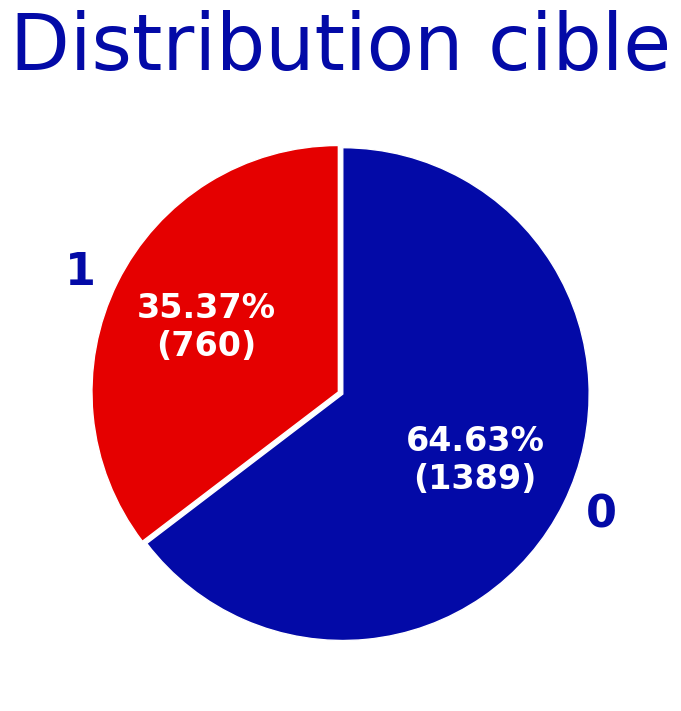

In [14]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(8,8), subplot_kw=dict(aspect="equal"))

affichage = donnees.reset_index().groupby(cible).Age.count().reset_index().rename(columns={'Age':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage[cible].values,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage[cible].count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Distribution cible",fontdict=dict(color="#030aa7", size=56));

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonTraitementValidation.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>256</b> individus</div>

In [15]:
X = donnees.copy()
y = X.reset_index()[cible]
y.index = X.index

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=256, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'validation'

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>256</b> individus</div>

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X_train, 
                                                     y_train, 
                                                     test_size=256, 
                                                     random_state=0, 
                                                     stratify = y_train
                                                   ) 
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'

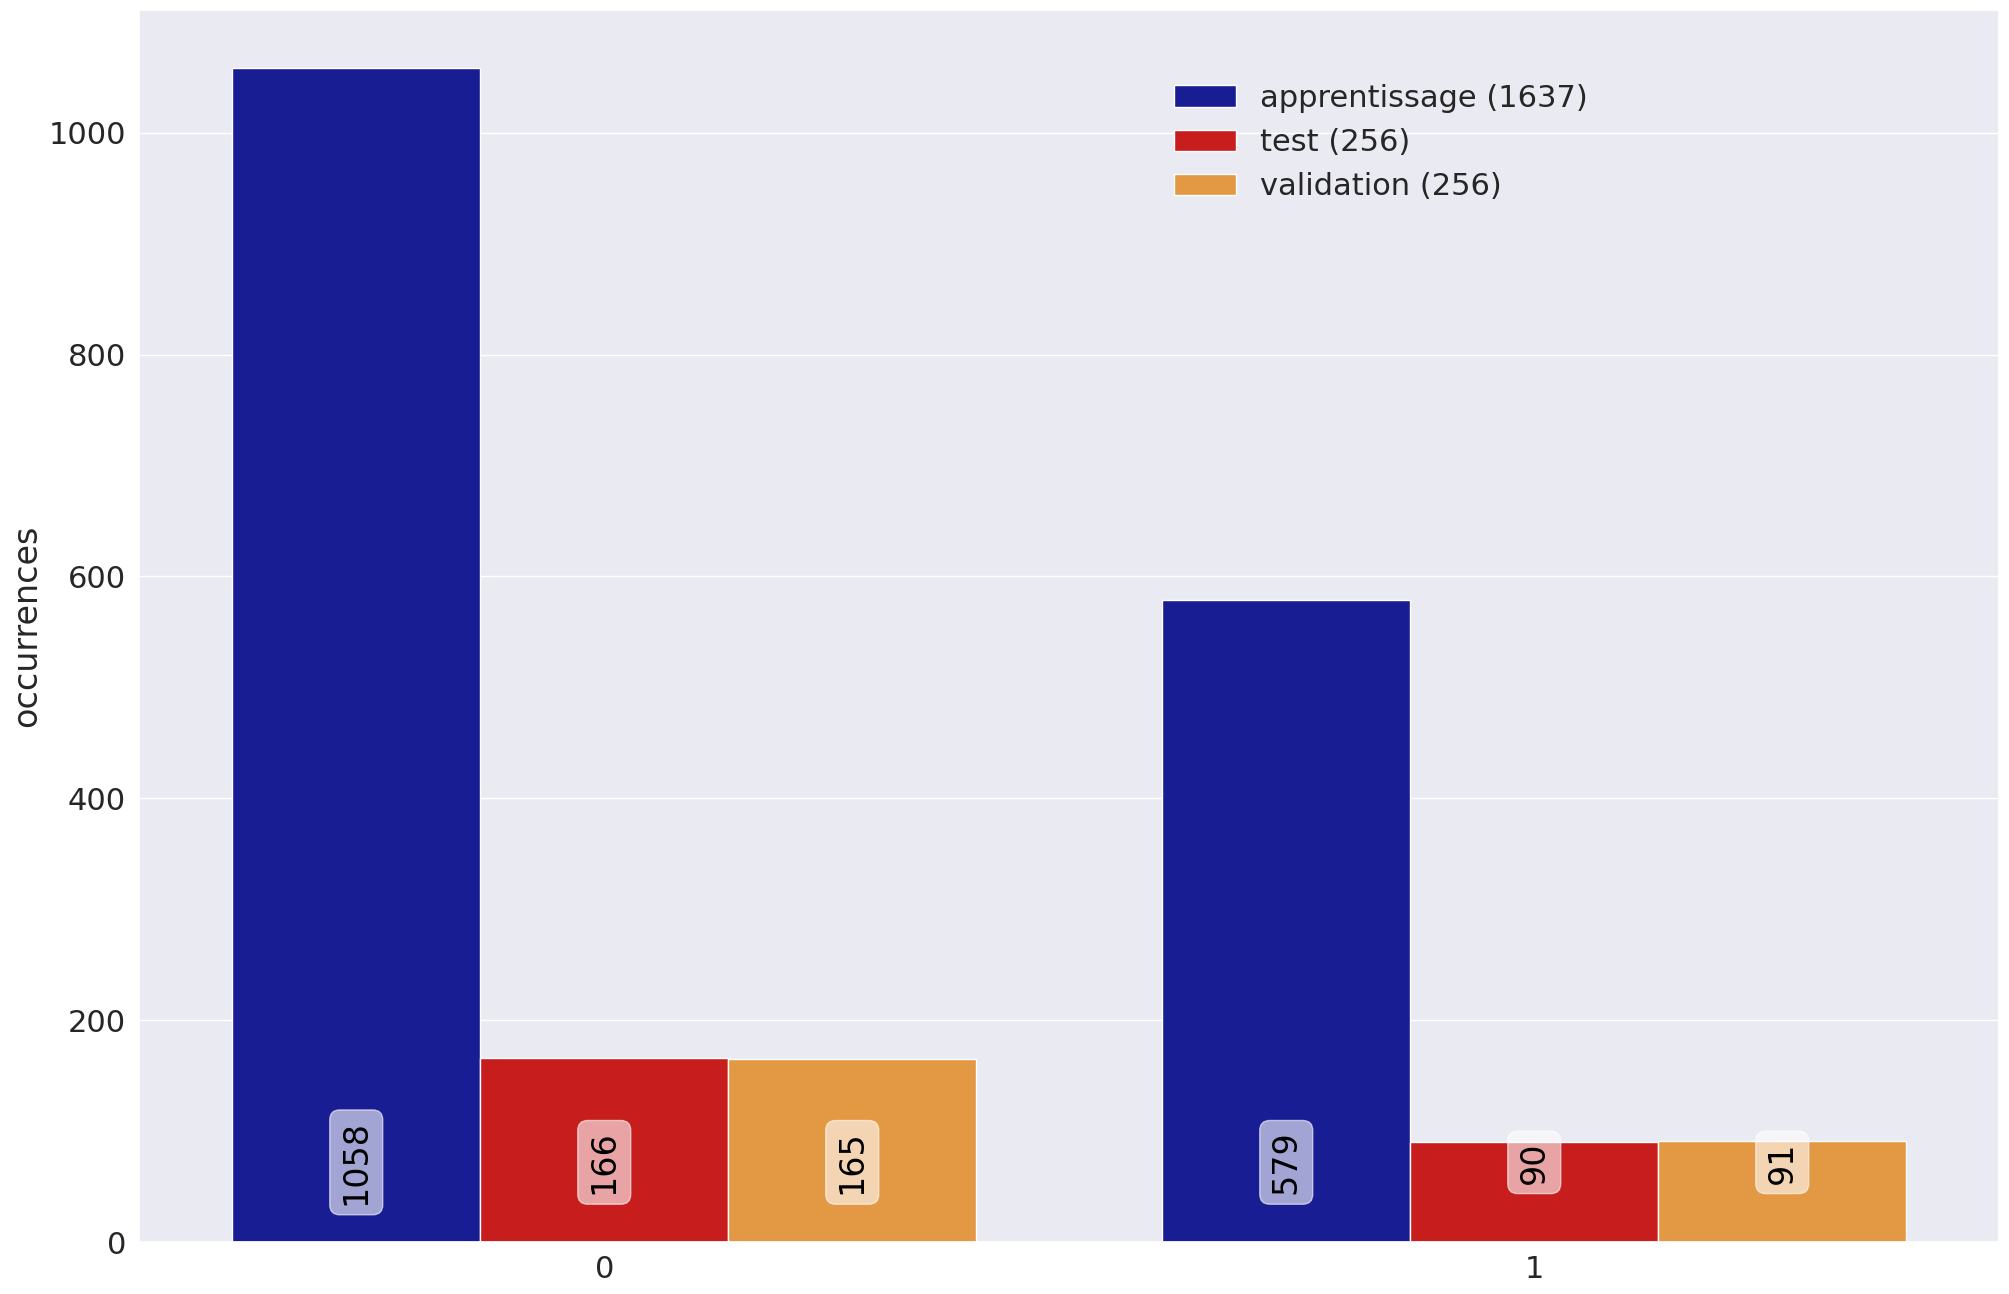

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(24,16))
afficheSeparationsBinaires(donnees, palette, ax, cible=cible)

In [19]:
donnees.reset_index(inplace=True)
donnees.set_index(['échantillon','PatientID', 'Diagnosis'],inplace=True)
donnees.to_parquet(os.path.join(projet.repertoireDonnees,'donnees_echantillons.parquet'))

In [20]:
X = donnees.copy()
y = X.reset_index()[cible]
y.index = X.index

In [21]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Déclaration des classificateurs </div></b>

In [22]:
classificateursDict =  initDictionnaireClassificateurs(arbres=128)
classificateursDict.pop('LightGBM') 
classificateursDict.pop('XGBoost')
# classificateursDict.pop('LogisticRegression')
classificateursDict.pop('Linear_SVM')

SVC(C=10, kernel='linear', probability=True)

In [23]:
classificateursDict

{'Random_Forest': RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=4,
                        n_estimators=128, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=128),
 'LogisticRegression': LogisticRegression(C=0.81113, max_iter=3000, n_jobs=-1),
 'Stochastic_GD': SGDClassifier(alpha=0.01, loss='log_loss', max_iter=200),
 'Gaussian_Process': GaussianProcessClassifier(n_jobs=-1),
 'Nearest_Neighbors': KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=17, p=1,
                      weights='distance'),
 'Radial_NuSVM': NuSVC(gamma=0.5, nu=0.195, probability=True),
 'Poly_NuSVM': NuSVC(kernel='poly', nu=0.1, probability=True),
 'GaussianNaiveBayes': GaussianNB(),
 'QuadraticDiscriminant': QuadraticDiscriminantAnalysis(),
 'Neural_Net': MLPClassifier(alpha=1)}

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Essai initial avec les donnes sans aucun traitement</div></b> 

AdaBoost               0.9023	--	Area under the ROC curve : 0.9201	--	Exécution  :.33s
GaussianNaiveBayes     0.7695	--	Area under the ROC curve : 0.8618	--	Exécution  :.01s
Gaussian_Process       0.6094	--	Area under the ROC curve : 0.5000	--	Exécution  :.97s
LogisticRegression     0.8164	--	Area under the ROC curve : 0.8852	--	Exécution  :.56s
Nearest_Neighbors      0.6289	--	Area under the ROC curve : 0.6052	--	Exécution  :.04s
Neural_Net             0.7734	--	Area under the ROC curve : 0.8722	--	Exécution  :.30s
Poly_NuSVM             0.6914	--	Area under the ROC curve : 0.7302	--	Exécution  :.37s
QuadraticDiscriminant  0.7930	--	Area under the ROC curve : 0.8607	--	Exécution  :.01s
Radial_NuSVM           0.6484	--	Area under the ROC curve : 0.5000	--	Exécution  :.71s
Random_Forest          0.8398	--	Area under the ROC curve : 0.9420	--	Exécution  :.52s
Stochastic_GD          0.6797	--	Area under the ROC curve : 0.7607	--	Exécution  :.02s


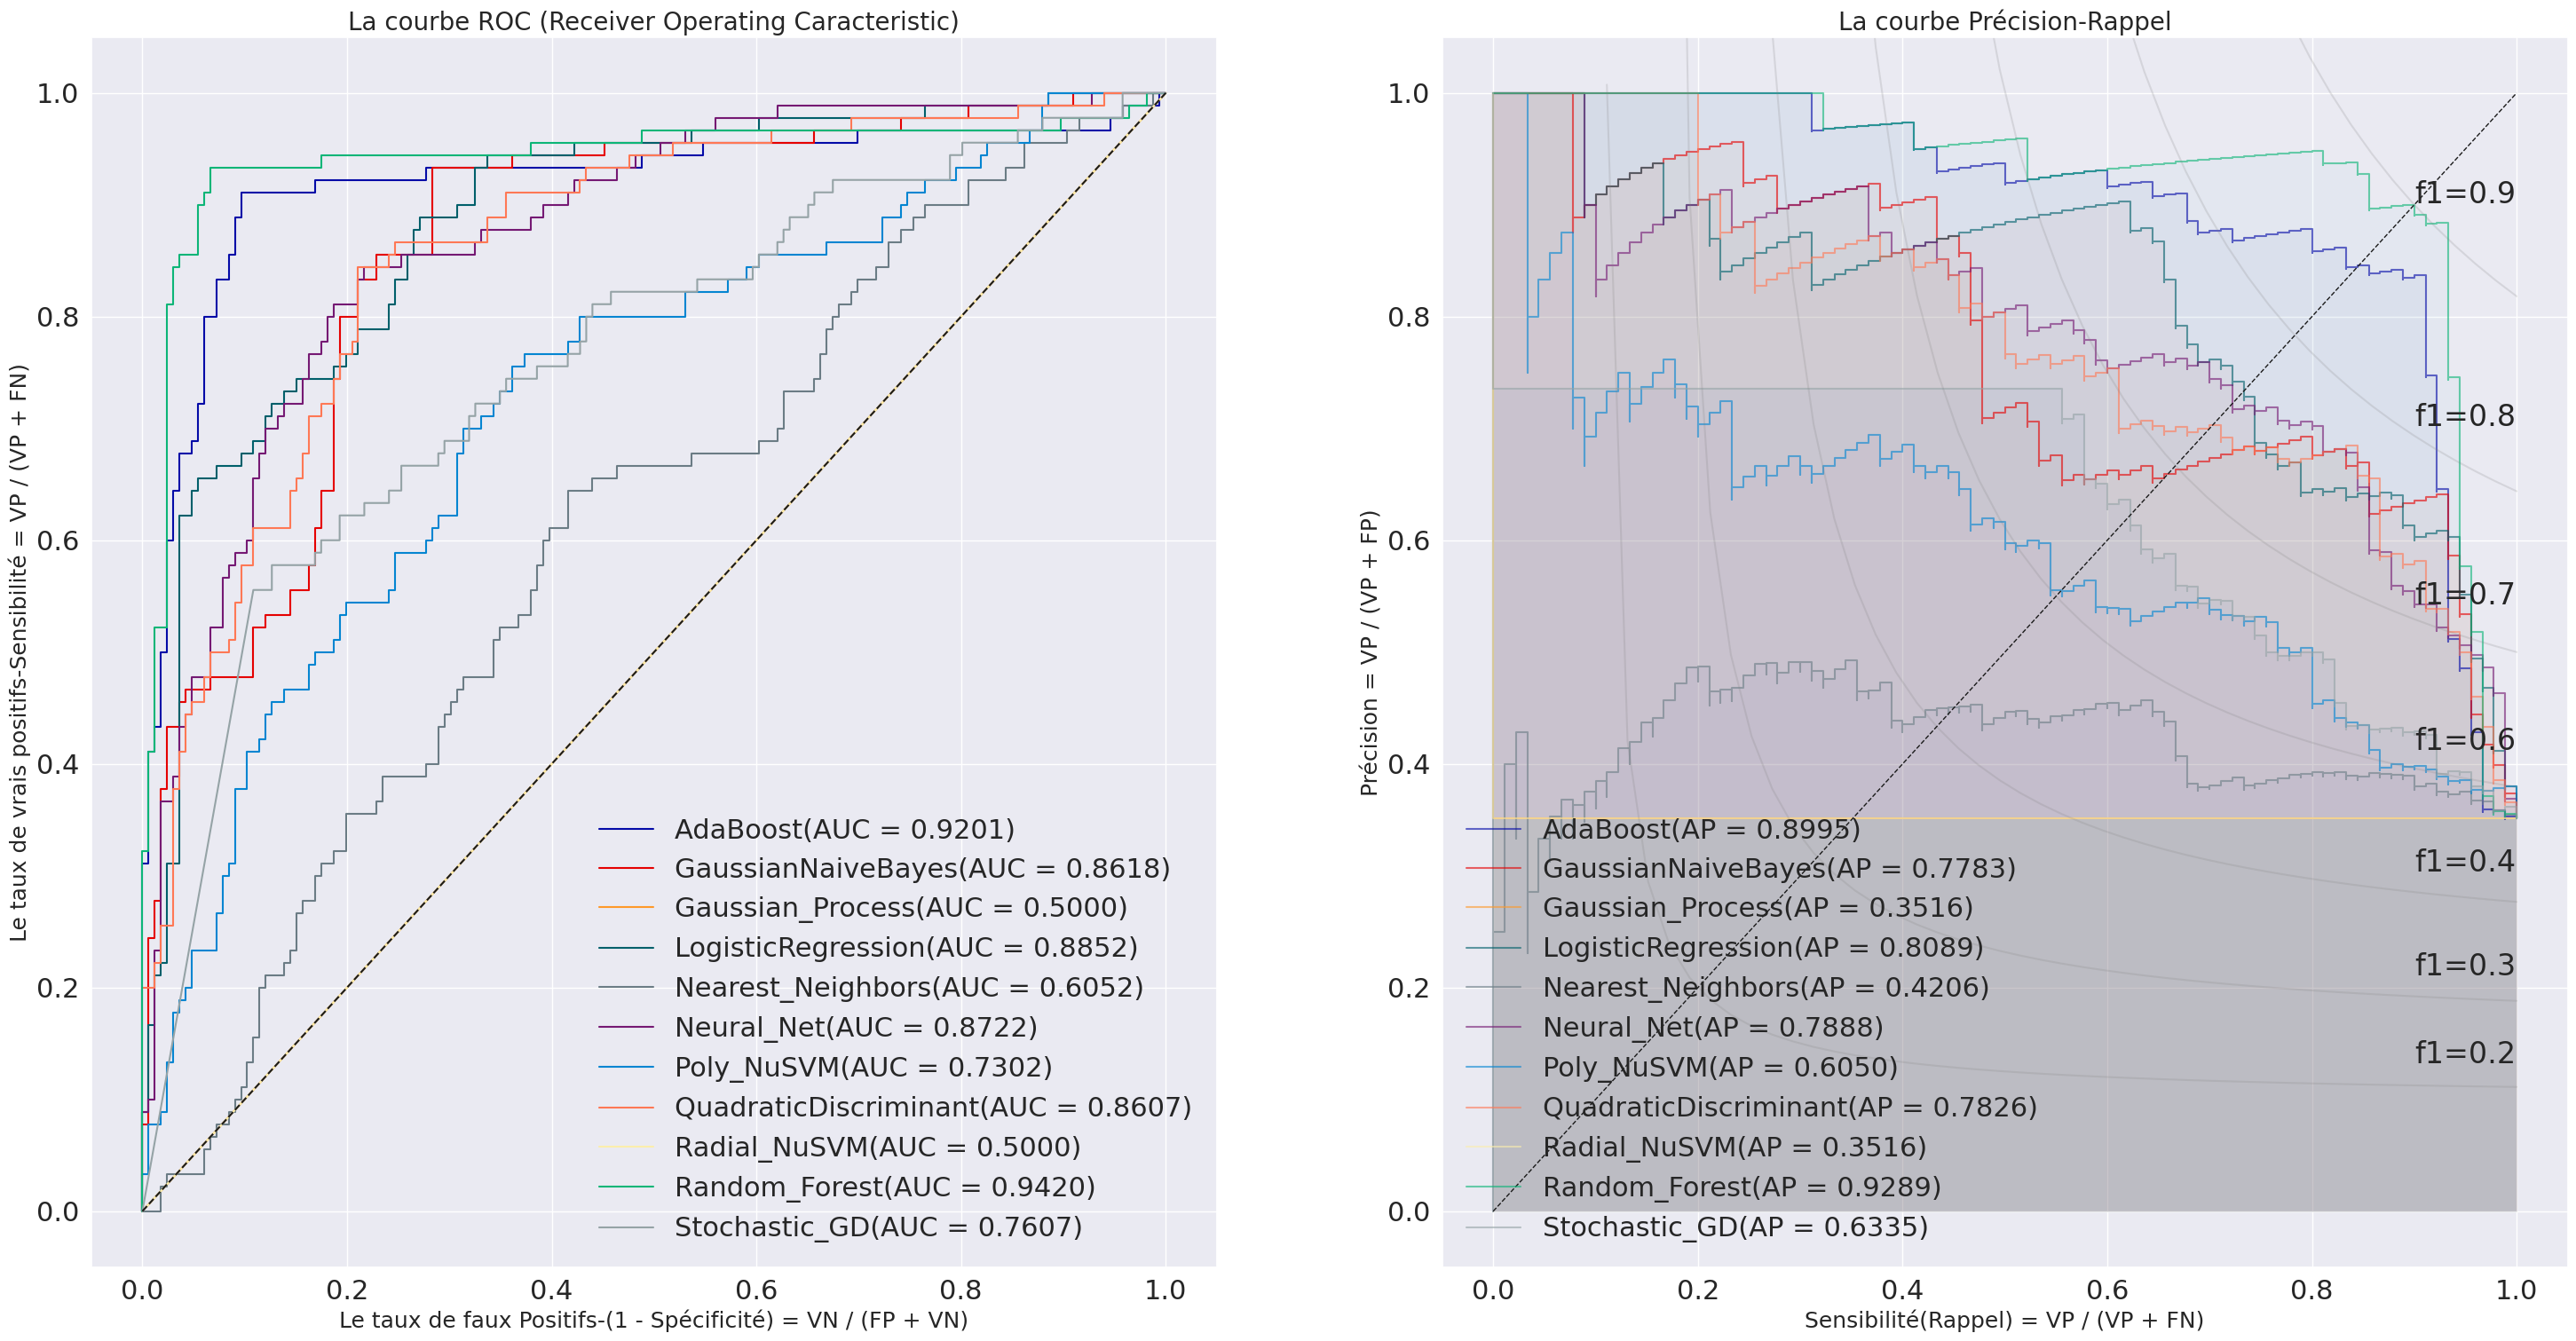

Exécution  :4.58s


In [24]:
resultats = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'Initial', 
                                                     projet=projet)

In [25]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('accuracy',ascending=False).head(16)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
AdaBoost,0.920080,0.899534,0.902344,0.866310,0.835052,0.900000,0.903614,3.519888,0.097656,0.764151,Initial
Random_Forest,0.942035,0.928866,0.839844,0.721088,0.929825,0.588889,0.975904,5.772616,0.160156,0.563830,Initial
LogisticRegression,0.885207,0.808906,0.816406,0.737430,0.741573,0.733333,0.861446,6.617389,0.183594,0.584071,Initial
QuadraticDiscriminant,0.860710,0.782633,0.792969,0.707182,0.703297,0.711111,0.837349,7.462163,0.207031,0.547009,Initial
Neural_Net,0.872155,0.788804,0.773438,0.573529,0.847826,0.433333,0.957831,8.166140,0.226562,0.402062,Initial
GaussianNaiveBayes,0.861847,0.778303,0.769531,0.677596,0.666667,0.688889,0.813253,8.306936,0.230469,0.512397,Initial
Poly_NuSVM,0.730187,0.604958,0.691406,0.614634,0.547826,0.700000,0.686747,11.122846,0.308594,0.443662,Initial
Stochastic_GD,0.760710,0.633462,0.679688,0.616822,0.532258,0.733333,0.650602,11.545233,0.320312,0.445946,Initial
Radial_NuSVM,0.500000,0.351562,0.648438,0.000000,0.000000,0.000000,1.000000,12.671597,0.351562,0.000000,Initial


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Les données centrées et réduites (StandardScaler)</div></b> 

In [26]:
from sklearn.preprocessing import StandardScaler
modelStd = StandardScaler()
donnees[quantitatives] = modelStd.fit_transform(donnees[quantitatives])

In [27]:
X = donnees.copy()
y = X.reset_index()[cible]
y.index = X.index

In [28]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

AdaBoost               0.9023	--	Area under the ROC curve : 0.9201	--	Exécution  :.35s
GaussianNaiveBayes     0.7695	--	Area under the ROC curve : 0.8618	--	Exécution  :.01s
Gaussian_Process       0.7852	--	Area under the ROC curve : 0.7948	--	Exécution  :1.11s
LogisticRegression     0.8164	--	Area under the ROC curve : 0.8852	--	Exécution  :.19s
Nearest_Neighbors      0.7891	--	Area under the ROC curve : 0.8304	--	Exécution  :.05s
Neural_Net             0.8516	--	Area under the ROC curve : 0.9096	--	Exécution  :.75s
Poly_NuSVM             0.7852	--	Area under the ROC curve : 0.8094	--	Exécution  :.55s
QuadraticDiscriminant  0.7930	--	Area under the ROC curve : 0.8607	--	Exécution  :.01s
Radial_NuSVM           0.6484	--	Area under the ROC curve : 0.8023	--	Exécution  :.70s
Random_Forest          0.8359	--	Area under the ROC curve : 0.9402	--	Exécution  :.48s
Stochastic_GD          0.8242	--	Area under the ROC curve : 0.8781	--	Exécution  :.01s


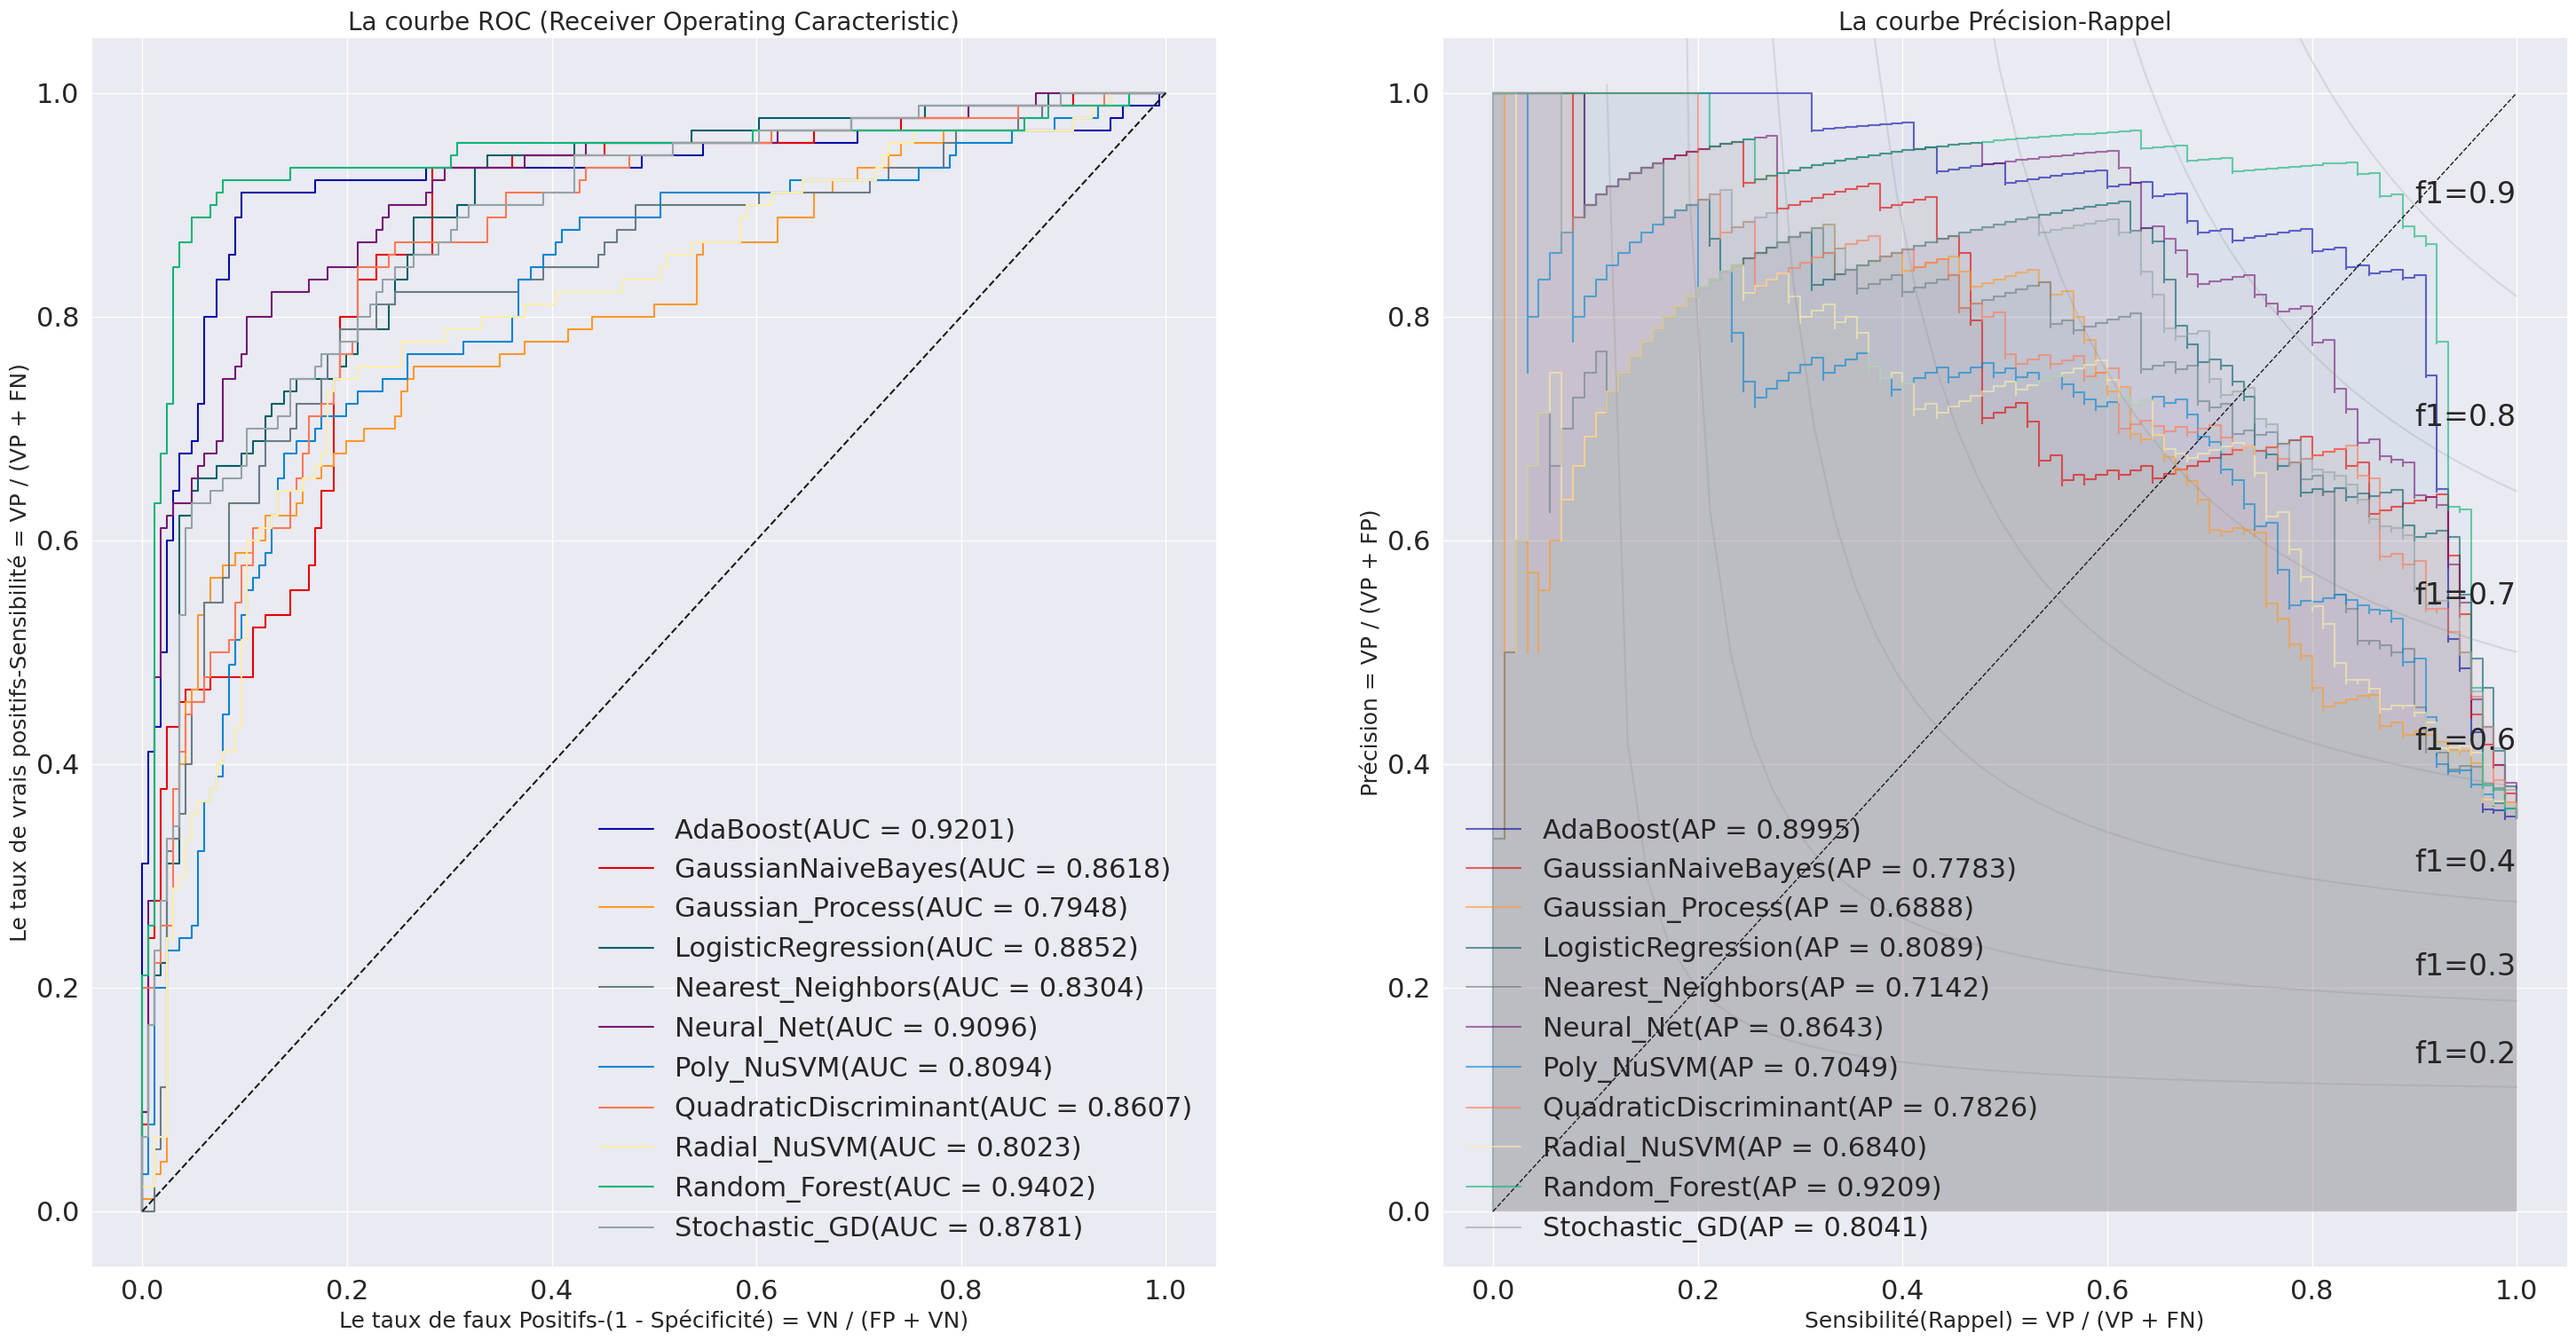

Exécution  :4.92s


In [29]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'StandardScaler', 
                                                     projet=projet)

In [30]:
resultats = pd.concat([resultats,resultatsTemp])

In [31]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('accuracy',ascending=False).head(16)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
AdaBoost,0.920080,0.899534,0.902344,0.866310,0.835052,0.900000,0.903614,3.519888,0.097656,0.764151,Initial
AdaBoost,0.920080,0.899534,0.902344,0.866310,0.835052,0.900000,0.903614,3.519888,0.097656,0.764151,StandardScaler
Neural_Net,0.909572,0.864272,0.851562,0.781609,0.809524,0.755556,0.903614,5.350230,0.148438,0.641509,StandardScaler
Random_Forest,0.942035,0.928866,0.839844,0.721088,0.929825,0.588889,0.975904,5.772616,0.160156,0.563830,Initial
Random_Forest,0.940228,0.920944,0.835938,0.704225,0.961538,0.555556,0.987952,5.913412,0.164062,0.543478,StandardScaler
Stochastic_GD,0.878112,0.804099,0.824219,0.736842,0.777778,0.700000,0.891566,6.335798,0.175781,0.583333,StandardScaler
LogisticRegression,0.885207,0.808887,0.816406,0.737430,0.741573,0.733333,0.861446,6.617389,0.183594,0.584071,StandardScaler
LogisticRegression,0.885207,0.808906,0.816406,0.737430,0.741573,0.733333,0.861446,6.617389,0.183594,0.584071,Initial
QuadraticDiscriminant,0.860710,0.782633,0.792969,0.707182,0.703297,0.711111,0.837349,7.462163,0.207031,0.547009,StandardScaler


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Transformation des modalités en variables</div></b> 

In [32]:
for colonne in qualitativesBin + qualitativesM:
    createColumnsQualitatives(donnees,colonne)

In [33]:
X = donnees.copy()
y = X.reset_index()[cible]
y.index = X.index

In [34]:
X_train, X_test, y_train, y_test = X.loc[('apprentissage'),:],\
                                   X.loc[('test'),:],\
                                   y.loc[('apprentissage')],\
                                   y.loc[('test')] 

AdaBoost               0.8945	--	Area under the ROC curve : 0.9161	--	Exécution  :.34s
GaussianNaiveBayes     0.7188	--	Area under the ROC curve : 0.8261	--	Exécution  :.01s
Gaussian_Process       0.7773	--	Area under the ROC curve : 0.8135	--	Exécution  :.93s
LogisticRegression     0.8086	--	Area under the ROC curve : 0.8871	--	Exécution  :.20s
Nearest_Neighbors      0.7578	--	Area under the ROC curve : 0.8443	--	Exécution  :.05s
Neural_Net             0.8203	--	Area under the ROC curve : 0.9120	--	Exécution  :.70s
Poly_NuSVM             0.8164	--	Area under the ROC curve : 0.8619	--	Exécution  :.54s
QuadraticDiscriminant  0.4922	--	Area under the ROC curve : 0.5841	--	Exécution  :.01s
Radial_NuSVM           0.6484	--	Area under the ROC curve : 0.8172	--	Exécution  :.74s
Random_Forest          0.7695	--	Area under the ROC curve : 0.9252	--	Exécution  :.51s
Stochastic_GD          0.8125	--	Area under the ROC curve : 0.8853	--	Exécution  :.02s


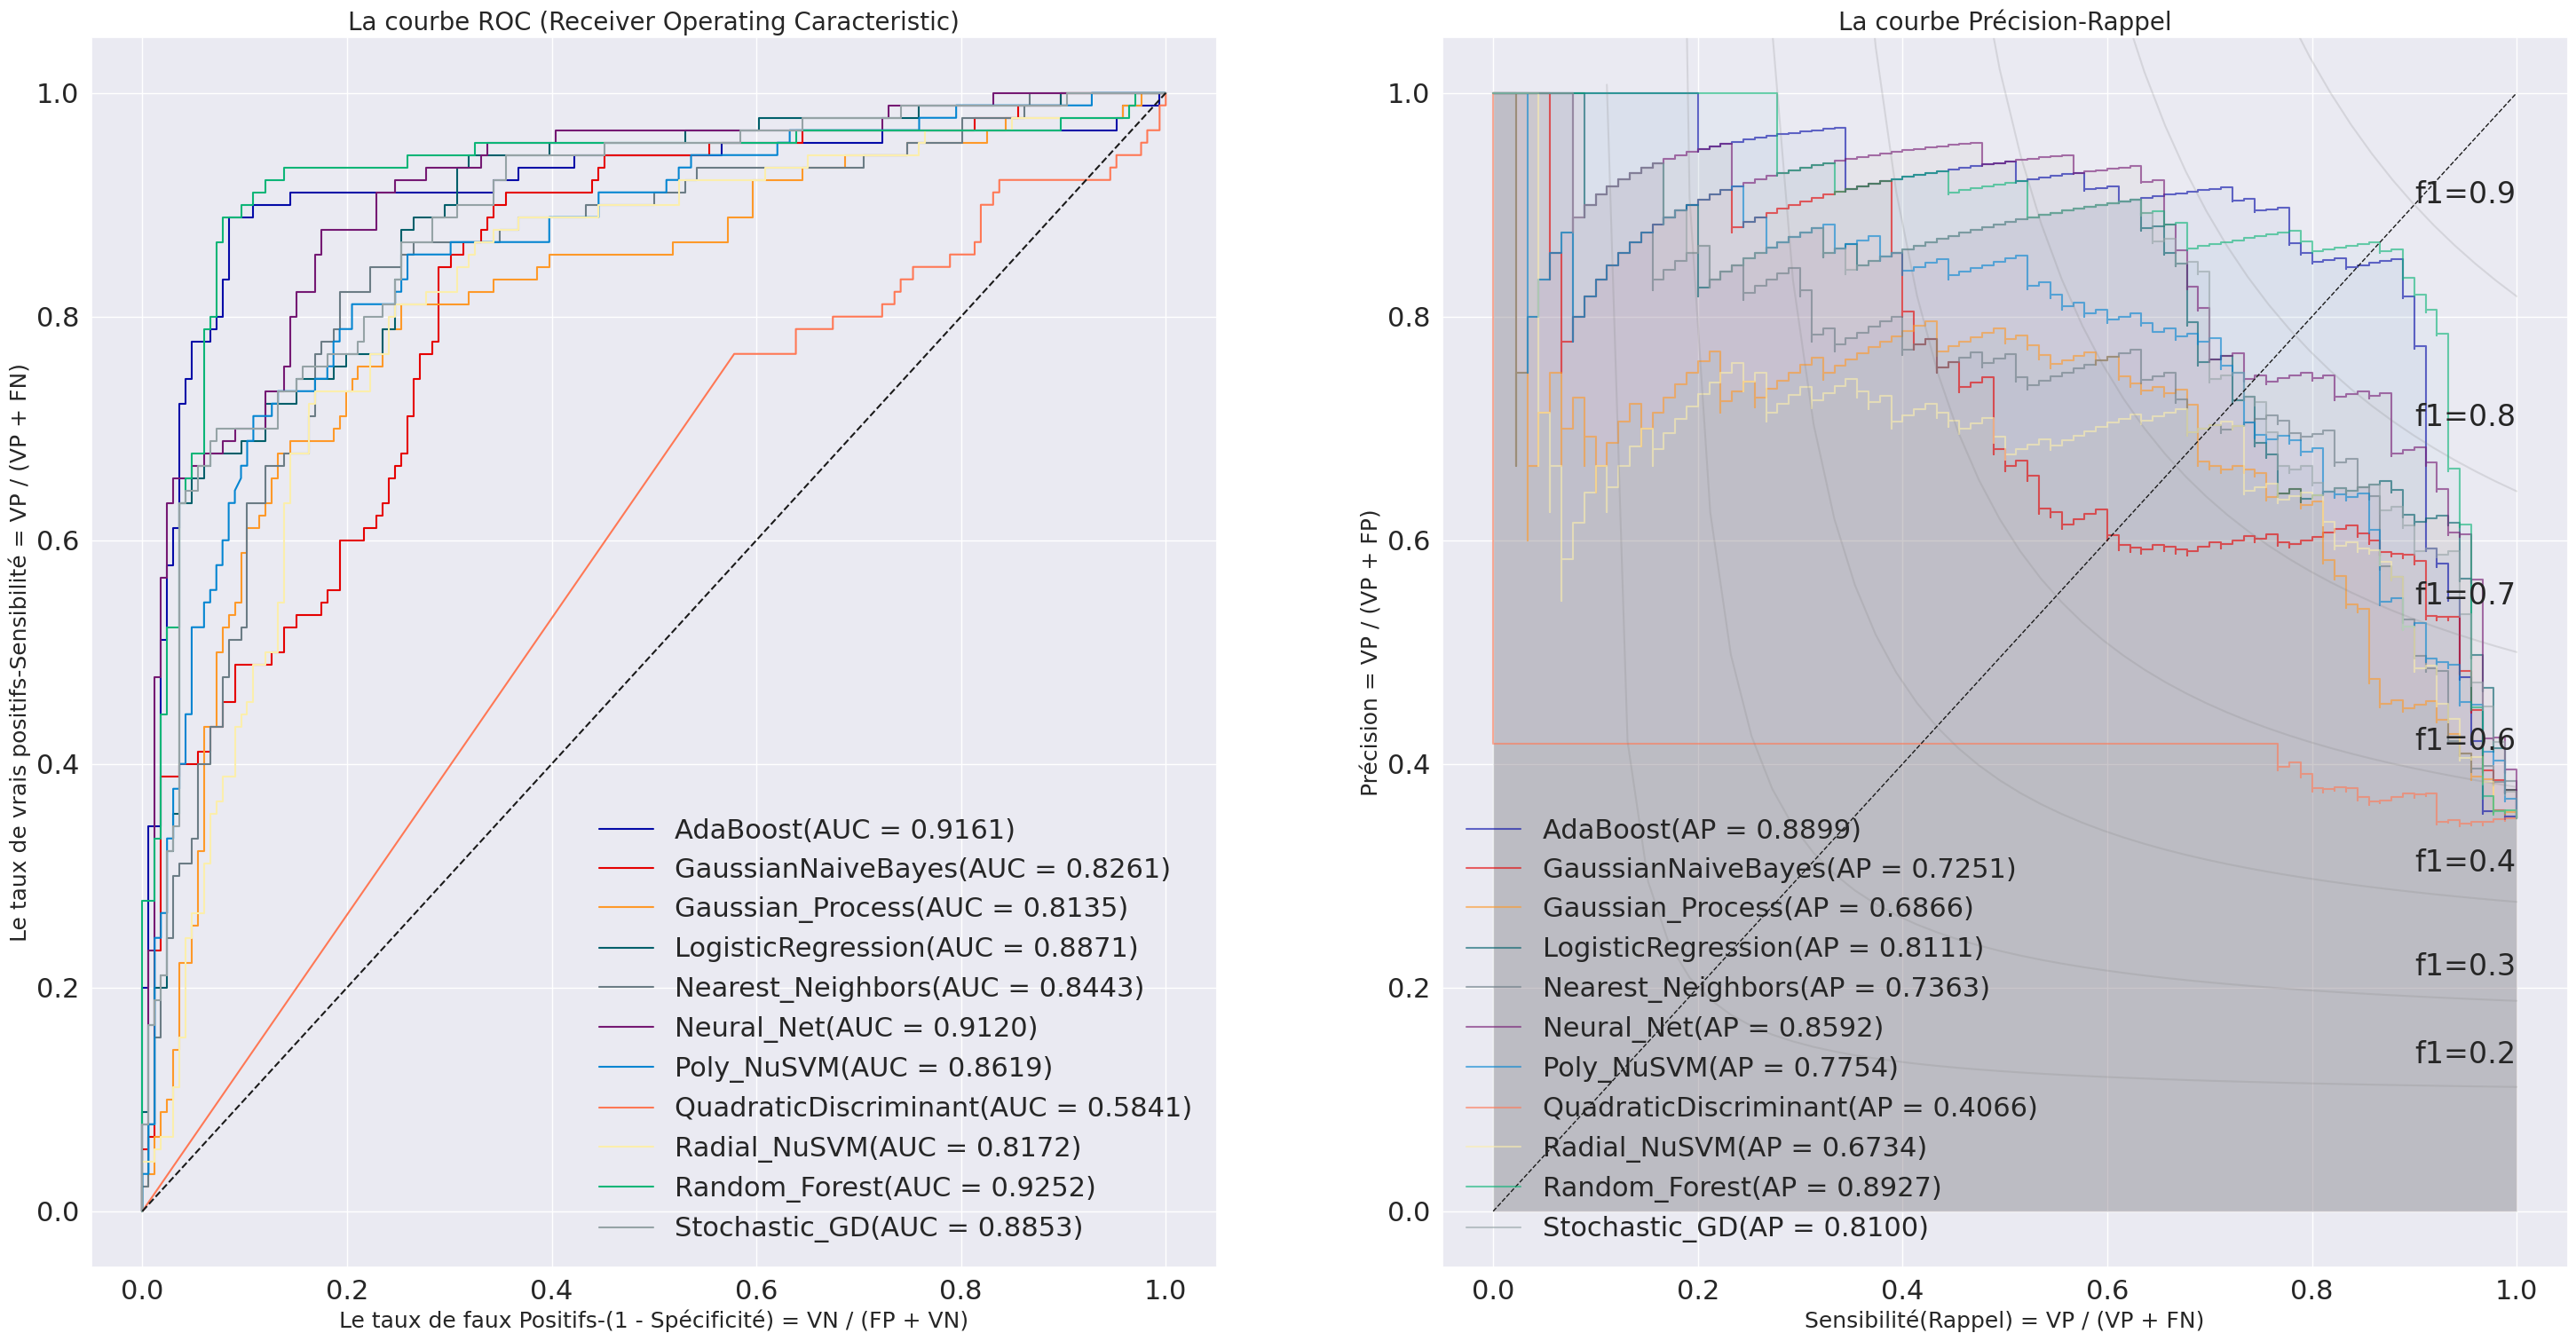

Exécution  :4.77s


In [35]:
resultatsTemp = executionEssaiComparaisonClassificateurs(classificateursDict, 
                                                     X_train, 
                                                     y_train,
                                                     X_test, 
                                                     y_test, 
                                                     couleurs = palette,
                                                     nom_essai = 'Modalités', 
                                                     projet=projet)

In [36]:
resultats = pd.concat([resultats,resultatsTemp])

In [37]:
resultats.drop(columns=['vrais_positifs', 'vrais_negatifs',
                         'faux_positifs', 'faux_negatifs']).sort_values('accuracy',ascending=False).head(16)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,specificite,logloss,hammingloss,jaccard,essai
Classifieur,,,,,,,,,,,
AdaBoost,0.920080,0.899534,0.902344,0.866310,0.835052,0.900000,0.903614,3.519888,0.097656,0.764151,Initial
AdaBoost,0.920080,0.899534,0.902344,0.866310,0.835052,0.900000,0.903614,3.519888,0.097656,0.764151,StandardScaler
AdaBoost,0.916131,0.889892,0.894531,0.857143,0.818182,0.900000,0.891566,3.801479,0.105469,0.750000,Modalités
Neural_Net,0.909572,0.864272,0.851562,0.781609,0.809524,0.755556,0.903614,5.350230,0.148438,0.641509,StandardScaler
Random_Forest,0.942035,0.928866,0.839844,0.721088,0.929825,0.588889,0.975904,5.772616,0.160156,0.563830,Initial
Random_Forest,0.940228,0.920944,0.835938,0.704225,0.961538,0.555556,0.987952,5.913412,0.164062,0.543478,StandardScaler
Stochastic_GD,0.878112,0.804099,0.824219,0.736842,0.777778,0.700000,0.891566,6.335798,0.175781,0.583333,StandardScaler
Neural_Net,0.912048,0.859210,0.820312,0.735632,0.761905,0.711111,0.879518,6.476594,0.179688,0.581818,Modalités
LogisticRegression,0.885207,0.808906,0.816406,0.737430,0.741573,0.733333,0.861446,6.617389,0.183594,0.584071,Initial


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Affichage des évolutions des métriques dans les essais</div></b> 

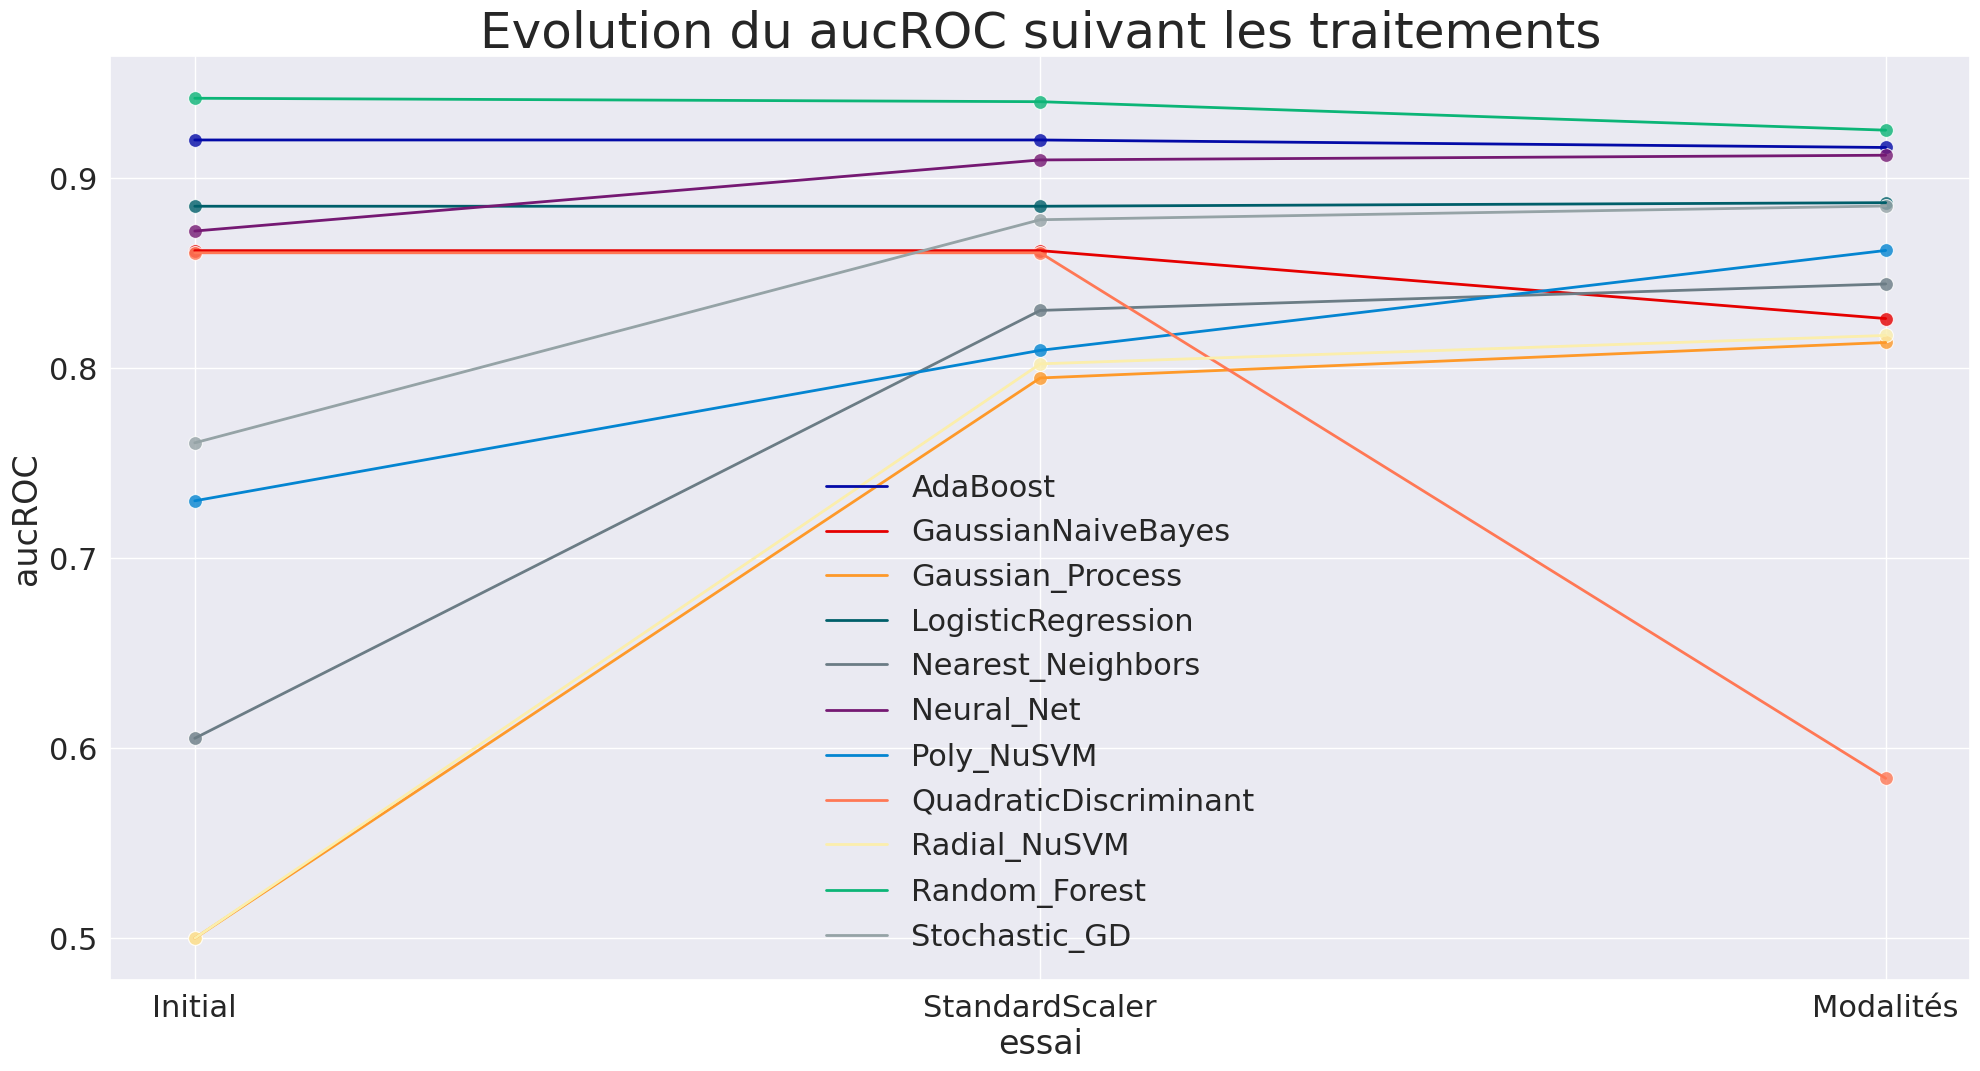

In [38]:
affichageEvolutionMetriques(resultats, metrique='aucROC', palette=palette)